# Explporatory Data Analysis

## Roles To Explore:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

In [2]:
# Data Loaded and Data Clean Up: DateTime column converted to DateTime DataType and job_skills column skills were string Converted to List

# dataset = load_dataset('lukebarousse/data_jobs')
# df = dataset['train'].to_pandas()
# Give (#) to the df below and and then remove (#) from the above (dataset & df) to review the Data on your device 

df = pd.read_csv('data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df['job_country'].value_counts().head(5)

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Name: count, dtype: int64

In [4]:
df_DA_US_IND = df[(df['job_country'] == 'United States') | (df['job_country'] == 'India')].copy()

In [5]:
df_DA_US_IND = df_DA_US_IND[df_DA_US_IND['job_title_short'] == 'Data Analyst']

In [6]:
df_DA_US_IND.reset_index(inplace=True, drop=True)

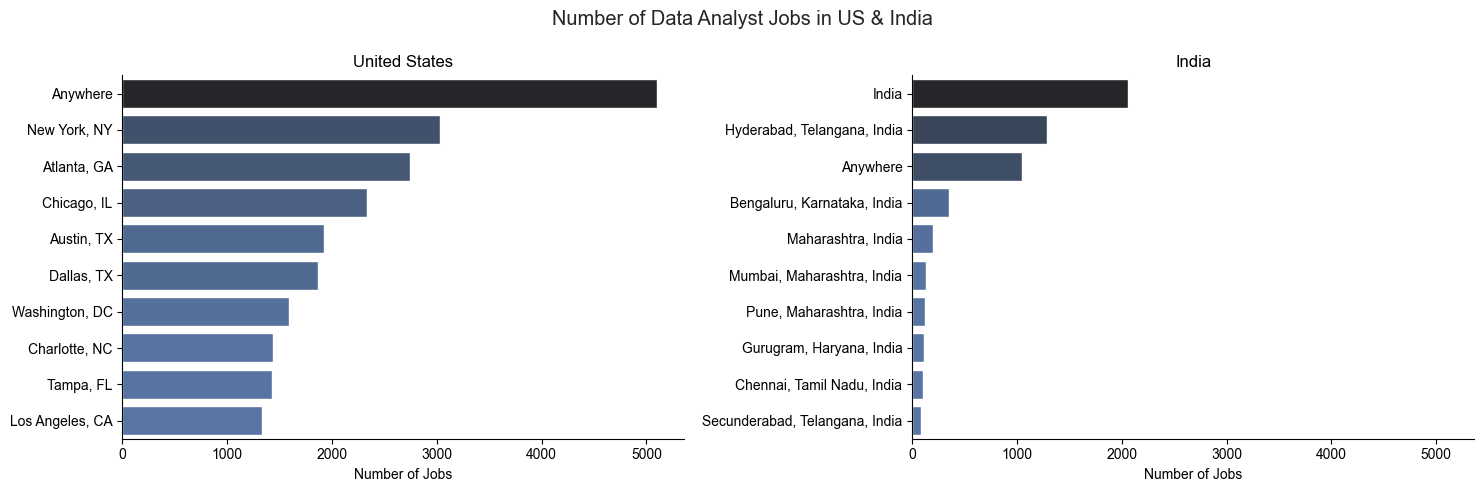

In [7]:
df_plot1 = df_DA_US_IND['job_location'][df_DA_US_IND['job_country'] == 'United States'].value_counts().head(10).to_frame()
df_plot2 = df_DA_US_IND['job_location'][df_DA_US_IND['job_country'] == 'India'].value_counts().head(10).to_frame()

fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.set_theme(style='ticks')
sns.despine()

sns.barplot(df_plot1, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False, ax=ax[0])
ax[0].set_xlabel('Number of Jobs')
ax[0].set_ylabel('')
ax[0].set_title('United States')

sns.barplot(df_plot2, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False, ax=ax[1])
ax[1].set_xlabel('Number of Jobs')
ax[1].set_ylabel('')
ax[1].set_title('India')
ax[1].set_xlim(ax[0].get_xlim())

plt.suptitle('Number of Data Analyst Jobs in US & India')
plt.tight_layout()
plt.show()

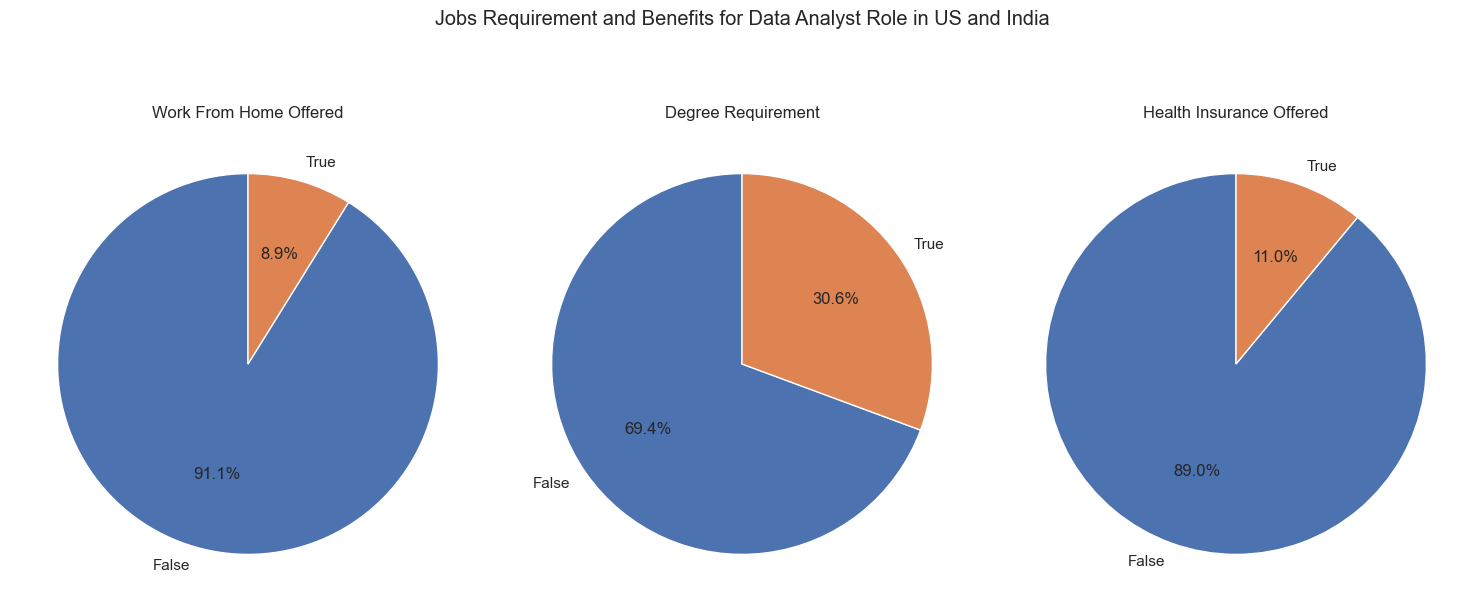

In [8]:
dict_column = {
    'job_work_from_home': 'Work From Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3, figsize=(15,7))

for i,(col,title) in enumerate(dict_column.items()):
    df[col].value_counts().plot(kind='pie', ax=ax[i], title=title, startangle=90, autopct='%1.1f%%')
    ax[i].set_ylabel('')

fig.suptitle('Jobs Requirement and Benefits for Data Analyst Role in US and India')
fig.tight_layout()

In [9]:
US_Ind_Com = df_DA_US_IND.groupby(['job_country', 'company_name']).agg(job_count = ('company_name','count')).sort_values(by='job_count',ascending=False)

In [10]:
Ind_com = US_Ind_Com.loc['India'].head(10)
Ind_com

,job_count
company_name,
SAZ India,100
S&P Global,93
Confidential,82
Prometrics Solutions,72
PepsiCo,58
Maxgen Technologies Private Limited,57
JPMorgan Chase & Co.,53
JP Morgan Chase,51
Ovidtech Technologies,49


In [11]:
US_com = US_Ind_Com.loc['United States'].head(10)
US_com

,job_count
company_name,
Robert Half,959
Insight Global,827
Dice,584
UnitedHealth Group,507
Get It Recruit - Information Technology,503
Citi,477
Corporate,416
SynergisticIT,374
Centene Corporation,350


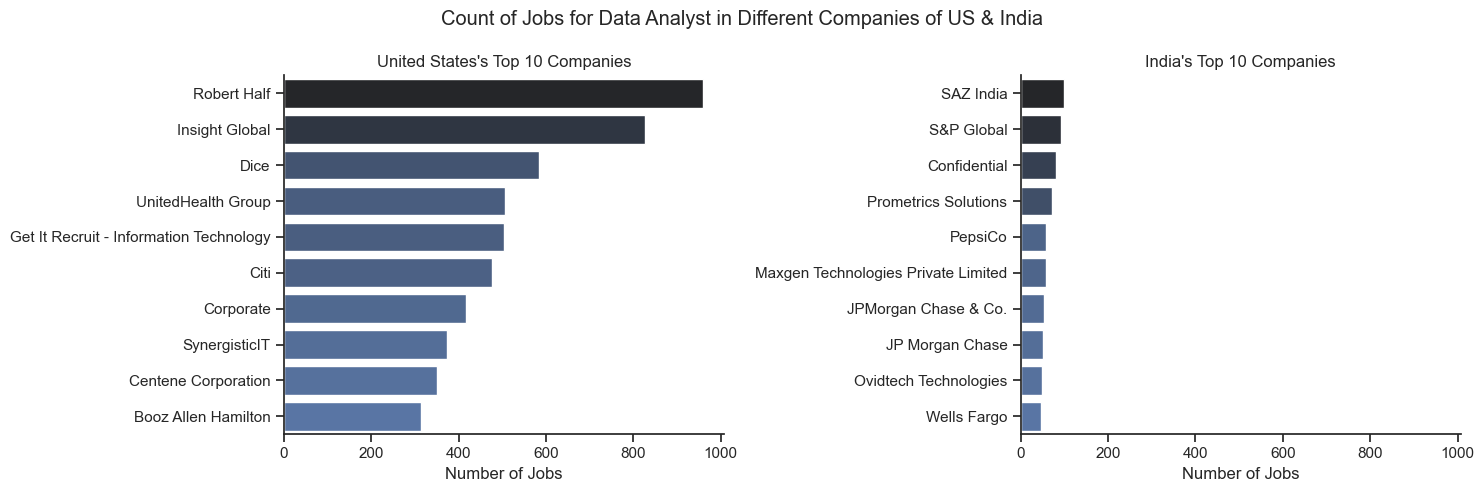

In [12]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.set_theme(style='ticks')
sns.despine()

sns.barplot(US_com, x='job_count', y='company_name', ax=ax[0], hue='job_count', palette='dark:b_r', legend=False)
ax[0].set_title("United States's Top 10 Companies")
ax[0].set_xlabel('Number of Jobs')
ax[0].set_ylabel('')


sns.barplot(Ind_com, x='job_count', y='company_name', ax=ax[1], hue='job_count', palette='dark:b_r', legend=False)
ax[1].set_title("India's Top 10 Companies")
ax[1].set_xlabel('Number of Jobs')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())

plt.suptitle('Count of Jobs for Data Analyst in Different Companies of US & India')
plt.tight_layout()
plt.show()